# Cleaning Data in R

It's commonly said that data scientists spend 80% of their time cleaning and manipulating data and only 20% of their time analyzing it. The time spent cleaning is vital since analyzing dirty data can lead you to draw inaccurate conclusions.

In this course, you'll learn how to clean dirty data. Using R, you'll learn how to identify values that don't look right and fix dirty data by converting data types, filling in missing values, and using fuzzy string matching. As you learn, you’ll brush up on your skills by working with real-world datasets, including bike-share trips, customer asset portfolios, and restaurant reviews—developing the skills you need to go from raw data to awesome insights as quickly and accurately as possible!


## Common Data Problems

In this chapter, you'll learn how to overcome some of the most common dirty data problems. You'll convert data types, apply range constraints to remove future data points, and remove duplicated data points to avoid double-counting.

### Converting data types
Throughout this chapter, you'll be working with San Francisco bike share ride data called bike_share_rides. It contains information on start and end stations of each trip, the trip duration, and some user information.

Before beginning to analyze any dataset, it's important to take a look at the different types of columns you'll be working with, which you can do using glimpse().

In this exercise, you'll take a look at the data types contained in bike_share_rides and see how an incorrect data type can flaw your analysis.

dplyr and assertive are loaded and bike_share_rides is available.

In [6]:
library(dplyr)
library(assertive)

bike_share_rides <- readRDS("bike_share_rides_ch1_1.rds")

# Glimpse at bike_share_rides
glimpse(bike_share_rides)

# Summary of user_birth_year
summary(bike_share_rides$user_birth_year)

Rows: 35,229
Columns: 10
$ ride_id         <int> 52797, 54540, 87695, 45619, 70832, 96135, 29928, 83...
$ date            <chr> "2017-04-15", "2017-04-19", "2017-04-14", "2017-04-...
$ duration        <chr> "1316.15 minutes", "8.13 minutes", "24.85 minutes",...
$ station_A_id    <dbl> 67, 21, 16, 58, 16, 6, 5, 16, 5, 81, 30, 16, 16, 67...
$ station_A_name  <chr> "San Francisco Caltrain Station 2  (Townsend St at ...
$ station_B_id    <dbl> 89, 64, 355, 368, 81, 66, 350, 91, 62, 81, 109, 10,...
$ station_B_name  <chr> "Division St at Potrero Ave", "5th St at Brannan St...
$ bike_id         <dbl> 1974, 860, 2263, 1417, 507, 75, 388, 239, 1449, 328...
$ user_gender     <chr> "Male", "Male", "Male", "Male", "Male", "Male", "Ma...
$ user_birth_year <dbl> 1972, 1986, 1993, 1981, 1981, 1988, 1993, 1996, 199...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1900    1979    1986    1984    1991    2001 

In [7]:
# Add a new column to bike_share_rides called user_birth_year_fct, which contains user_birth_year, converted to a factor.
# and Assert that the user_birth_year_fct is a factor to confirm the conversion.

# Convert user_birth_year to factor: user_birth_year_fct
bike_share_rides <- bike_share_rides %>%
  mutate(user_birth_year_fct = as.factor(user_birth_year))

# Assert user_birth_year_fct is a factor
assert_is_factor(bike_share_rides$user_birth_year_fct)

# Summary of user_birth_year_fct
summary(bike_share_rides$user_birth_year_fct)

1900 1902 1923 1931 1938 1939 1941 1942 1943 1945 1946 1947 1948 1949 1950 1951 
   1    7    2   23    2    1    3   10    4   16    5   24    9   30   37   25 
1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 
  70   49   65   66  112   62  156   99  196  161  256  237  245  349  225  363 
1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 
 365  331  370  548  529  527  563  601  481  541  775  876  825 1016 1056 1262 
1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 
1157 1318 1606 1672 2135 1872 2062 1582 1703 1498 1476 1185  813  358  365  348 
2000 2001 
 473   30

### Trimming strings
In the previous exercise, you were able to identify the correct data type and convert user_birth_year to the correct type, allowing you to extract counts that gave you a bit more insight into the dataset.

Another common dirty data problem is having extra bits like percent signs or periods in numbers, causing them to be read in as characters. In order to be able to crunch these numbers, the extra bits need to be removed and the numbers need to be converted from character to numeric. In this exercise, you'll need to convert the duration column from character to numeric, but before this can happen, the word "minutes" needs to be removed from each value.

In [9]:
library(stringr)

bike_share_rides <- bike_share_rides %>%
  # Remove 'minutes' from duration: duration_trimmed
  mutate(duration_trimmed = str_remove(duration, "minutes"),
         # Convert duration_trimmed to numeric: duration_mins
         duration_mins = as.numeric(duration_trimmed))

# Glimpse at bike_share_rides
glimpse(bike_share_rides)

# Assert duration_mins is numeric
assert_is_numeric(bike_share_rides$duration_mins)

# Calculate mean duration
mean(bike_share_rides$duration_mins)

Rows: 35,229
Columns: 13
$ ride_id             <int> 52797, 54540, 87695, 45619, 70832, 96135, 29928...
$ date                <chr> "2017-04-15", "2017-04-19", "2017-04-14", "2017...
$ duration            <chr> "1316.15 minutes", "8.13 minutes", "24.85 minut...
$ station_A_id        <dbl> 67, 21, 16, 58, 16, 6, 5, 16, 5, 81, 30, 16, 16...
$ station_A_name      <chr> "San Francisco Caltrain Station 2  (Townsend St...
$ station_B_id        <dbl> 89, 64, 355, 368, 81, 66, 350, 91, 62, 81, 109,...
$ station_B_name      <chr> "Division St at Potrero Ave", "5th St at Branna...
$ bike_id             <dbl> 1974, 860, 2263, 1417, 507, 75, 388, 239, 1449,...
$ user_gender         <chr> "Male", "Male", "Male", "Male", "Male", "Male",...
$ user_birth_year     <dbl> 1972, 1986, 1993, 1981, 1981, 1988, 1993, 1996,...
$ user_birth_year_fct <fct> 1972, 1986, 1993, 1981, 1981, 1988, 1993, 1996,...
$ duration_trimmed    <chr> "1316.15 ", "8.13 ", "24.85 ", "6.35 ", "9.8 ",...
$ duration_mins       <dbl>

[1] 13.06214

### Ride duration constraints
Values that are out of range can throw off an analysis, so it's important to catch them early on. In this exercise, you'll be examining the duration_min column more closely. Bikes are not allowed to be kept out for more than 24 hours, or 1440 minutes at a time, but issues with some of the bikes caused inaccurate recording of the time they were returned.

In this exercise, you'll replace erroneous data with the range limit (1440 minutes), however, you could just as easily replace these values with NAs.

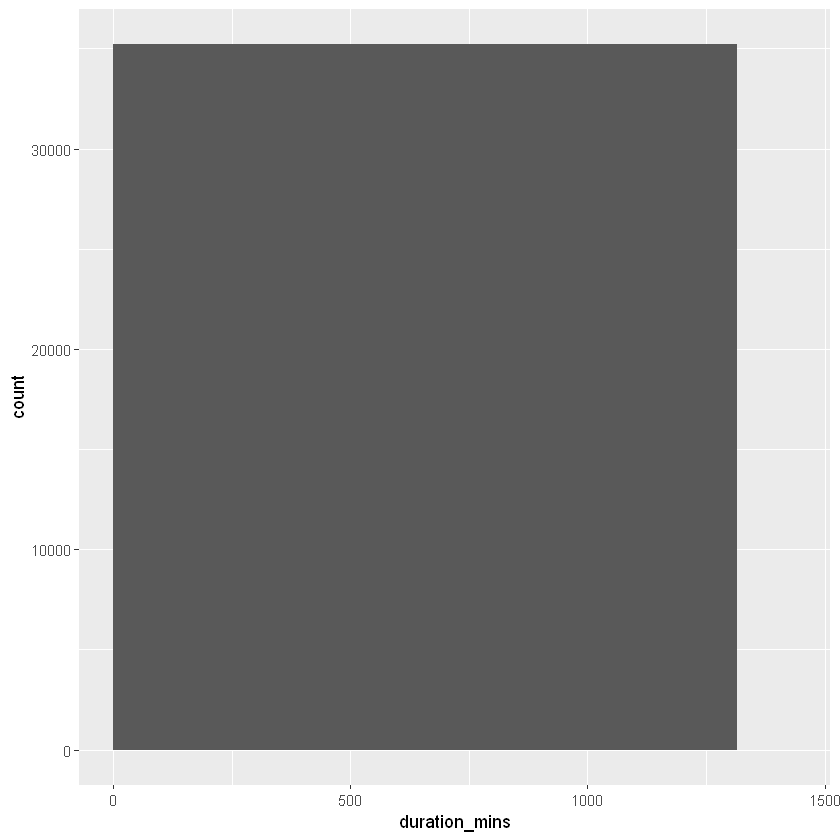

In [15]:
library(ggplot2)
# Create breaks
breaks <- c(min(bike_share_rides$duration_mins), 0, 1440, max(bike_share_rides$duration_mins))

# Create a histogram of duration_min
ggplot(bike_share_rides, aes(duration_mins)) +
  geom_histogram(breaks = breaks)


In [17]:
# Replace the values of duration_min that are greater than 1440 minutes (24 hours) with 1440. 
# Add this to bike_share_rides as a new column called duration_min_const.

# duration_min_const: replace vals of duration_min > 1440 with 1440

bike_share_rides <- bike_share_rides %>%
  mutate(duration_min_const = replace(duration_mins,duration_mins > 1440, 1440))

# Make sure all values of duration_min_const are between 0 and 1440
assert_all_are_in_closed_range(bike_share_rides$duration_min_const, lower = 0, upper = 1440)

### Back to the future
Something has gone wrong and it looks like you have data with dates from the future, which is way outside of the date range you expected to be working with. To fix this, you'll need to remove any rides from the dataset that have a date in the future. Before you can do this, the date column needs to be converted from a character to a Date. Having these as Date objects will make it much easier to figure out which rides are from the future, since R makes it easy to check if one Date object is before (<) or after (>) another.

In [18]:
library(lubridate)
# Convert date to Date type
bike_share_rides <- bike_share_rides %>%
  mutate(date =  as.Date(date))

# Make sure all dates are in the past
assert_all_are_in_past(bike_share_rides$date)

# Filter for rides that occurred before or on today's date
bike_share_rides_past <- bike_share_rides %>%
  filter(date < today())

# Make sure all dates from bike_share_rides_past are in the past
assert_all_are_in_past(bike_share_rides_past$date)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Warning message:
"Coercing bike_share_rides$date to class 'POSIXct'."Warning message:
"Coercing bike_share_rides_past$date to class 'POSIXct'."

### Full duplicates
You've been notified that an update has been made to the bike sharing data pipeline to make it more efficient, but that duplicates are more likely to be generated as a result. To make sure that you can continue using the same scripts to run your weekly analyses about ride statistics, you'll need to ensure that any duplicates in the dataset are removed first.

When multiple rows of a data frame share the same values for all columns, they're full duplicates of each other. Removing duplicates like this is important, since having the same value repeated multiple times can alter summary statistics like the mean and median. Each ride, including its ride_id should be unique.

In [20]:
# Count the number of full duplicates
sum(duplicated(bike_share_rides))  # there is no duplicates, this data is clean 

# Remove duplicates
bike_share_rides_unique <- distinct(bike_share_rides) # only to know how to do it  

# Count the full duplicates in bike_share_rides_unique
sum(duplicated(bike_share_rides_unique))

[1] 0

[1] 0

### Removing partial duplicates
Now that you've identified and removed the full duplicates, it's time to check for partial duplicates. Partial duplicates are a bit tricker to deal with than full duplicates. In this exercise, you'll first identify any partial duplicates and then practice the most common technique to deal with them, which involves dropping all partial duplicates, keeping only the first.

In [21]:
# Find duplicated ride_ids
bike_share_rides %>% 
  # Count the number of occurrences of each ride_id
  count(ride_id) %>% 
  # Filter for rows with a count > 1
  filter(n>1)

ride_id,n


In [ ]:
# Remove full and partial duplicates
bike_share_rides_unique <- bike_share_rides %>%
  # Only based on ride_id instead of all cols
  distinct(ride_id, .keep_all = TRUE)  # only to know how to do it  

# Find duplicated ride_ids in bike_share_rides_unique
bike_share_rides_unique %>%
  # Count the number of occurrences of each ride_id
   count(ride_id) %>%
  # Filter for rows with a count > 1
  filter(n > 1)

### Aggregating partial duplicates
Another way of handling partial duplicates is to compute a summary statistic of the values that differ between partial duplicates, such as mean, median, maximum, or minimum. This can come in handy when you're not sure how your data was collected and want an average, or if based on domain knowledge, you'd rather have too high of an estimate than too low of an estimate (or vice versa).

In [ ]:
# this code do not do nothing because there is no duplicated values in this data
bike_share_rides %>%
  # Group by ride_id and date
  group_by(ride_id, date) %>%
  # Add duration_min_avg column
  mutate(duration_min_avg = mean(duration_mins)) %>%
  # Remove duplicates based on ride_id and date, keep all cols
  distinct(ride_id, date, .keep_all = TRUE) %>%
  # Remove duration_min column
  select(-duration_mins)